# Plant Disease Detection System

#Codes
#IMPORTING THE NECCESSARY PACKAGES

import numpy as np
import pickle
import pandas as pd
import os as os
import sklearn
import tensorflow as tf

from os import listdir
from keras.layers import Conv2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer


from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
#DECLARING THE VARIABLES


epochs = 25
learning_rate = 0.0001
decay_rate = learning_rate / epochs
batch_size =128
default_image_size = tuple((256, 256))
image_size = 0

In [12]:
#LOADING THE DATASET

directory_root='New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

In [13]:
#REQUIRED VARIABLES INITIALIZATION


width=256
height=256
depth=3

In [14]:
#FUNCTION TO CONVERT IMAGES TO ARRAY

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [15]:
#LOADING OF IMAGES

image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Apple___Apple_scab ...
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'cv2' is not defined
Error : name 'c

In [17]:
#IMAGE SIZE

image_size = len(image_list)

In [34]:
#FUNCTION FOR LABELS

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [35]:
#PRINTING THE LABELS

print(label_binarizer.classes_)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

In [67]:
#NUMPY_ARRAYFUNCTION

np_image_list = np.array(image_list, dtype=np.float16) / 2225.0

In [68]:
# DATASET SPLITTING

print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [69]:
#FUNCTION

aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [73]:
#MODEL BUILDING


model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [71]:
#SUMMARY OF THE MODEL

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 activation_7 (Activation)   (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_6 (Bat  (None, 256, 256, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 85, 85, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 85, 85, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 85, 85, 64)       

In [72]:
#OPTIMIZATION OF MODEL

optimizer =tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',
   
)
# distribution
model.compile(loss="binary_crossentropy", optimizer=optimizer,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


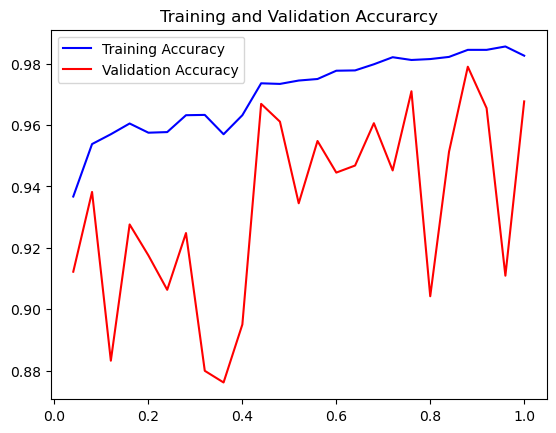

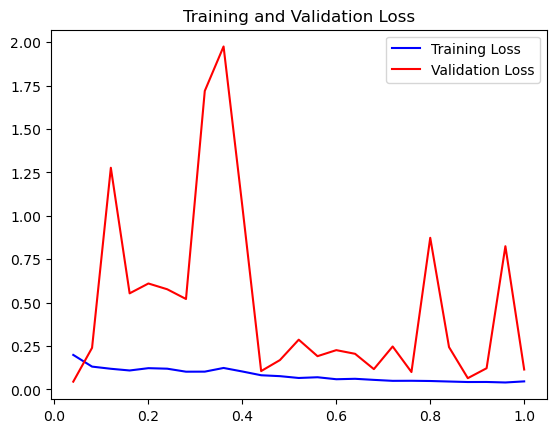

In [1]:

import numpy as np
import matplotlib.pyplot as plt
epochs = np.array([1/25,2/25,3/25,4/25,5/25,6/25,7/25,8/25,9/25,10/25,11/25,12/25,13/25,14/25,15/25,16/25,17/25,18/25,19/25,20/25,21/25,22/25,23/25,24/25,25/25])
acc = np.array([0.9367,0.9538,0.9570,0.9605,0.9575,0.9577,0.9632,0.96330,0.9570,0.9632,0.9736,0.9734,0.9745,0.9750,0.9777,0.9778,0.9798,0.9821,0.9812,0.9815,0.9822,0.9845,0.9845,0.9856,0.9826])
val_acc=np.array([0.9122,0.9382,0.8832,0.9276,0.9175,0.9063,0.9248,0.8799,0.8761,0.8950,0.9669,0.9611,0.9345,0.9548,0.9445,0.9468,0.9606,0.9452,0.9710,0.9042,0.9513,0.9790,0.9655,0.9109,0.9677])
loss=np.array([0.1989,0.1316,0.1191,0.1093,0.1226,0.1196,0.1023,0.1026,0.1238,0.1035,0.0818,0.0766,0.0661,0.0703,0.0589,0.0614,0.0552,0.0496,0.0500,0.0487,0.0457,0.0428,0.0431,0.0402,0.0465])
val_loss=np.array([0.04491,0.2397,1.2767,0.5535,0.6102,0.5770,0.5210,1.7190,1.9751,1.0540,0.1059,0.1692,0.2866,0.1917,0.2264,0.2053,0.1171,0.2475 ,0.1003,0.8733,0.2438,0.0650,0.1222,0.8248,0.1148 ])
 



#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.show()



#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


